# Data Analysis Interview Challenge

# Part 1 ‐ Exploratory data analysis

**The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline

In [2]:
master_login_df = pd.read_json('logins.json')

In [3]:
master_login_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
date_time_df = pd.DataFrame()
date_time_df = master_login_df

In [5]:
date_time_df.isnull().sum()

login_time    0
dtype: int64

In [6]:
len(date_time_df)

93142

**Resample with  15 min time interval**

In [7]:
date_time_df.set_index('login_time', inplace=True)
date_time_df['login_count'] = 1
date_time_df = date_time_df.resample('15T').sum()

In [8]:
date_time_df.head()

,login_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [9]:
login_time_df = date_time_df.index

In [10]:
date_time_df['day'] = login_time_df.day
date_time_df['month'] = login_time_df.month
date_time_df['year'] = login_time_df.year
date_time_df['weekday'] = login_time_df.weekday
date_time_df['hour'] = login_time_df.hour

In [11]:
date_time_df.head()

,login_count,day,month,year,weekday,hour
login_time,,,,,,
1970-01-01 20:00:00,2,1,1,1970,3,20
1970-01-01 20:15:00,6,1,1,1970,3,20
1970-01-01 20:30:00,9,1,1,1970,3,20
1970-01-01 20:45:00,7,1,1,1970,3,20
1970-01-01 21:00:00,1,1,1,1970,3,21


In [12]:
#date_time_df.set_index('login_time',inplace=True)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'No of logins in 15 min of time interval')

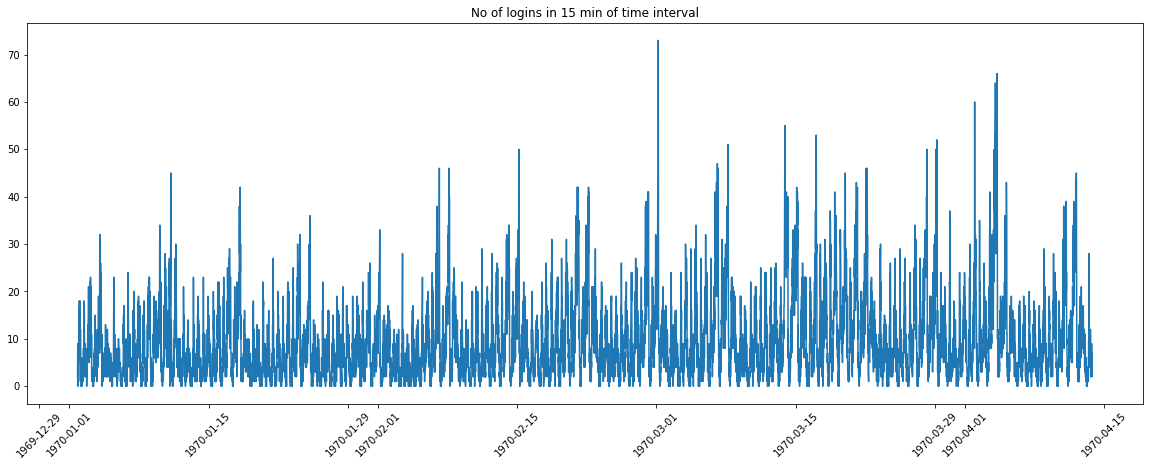

In [13]:
plt.figure(figsize=(20,7))
plt.plot(date_time_df['login_count'])
plt.xticks(rotation=45)
plt.title("No of logins in 15 min of time interval")

**No of login month wise**

Text(0.5, 1.0, 'No of logins per month')

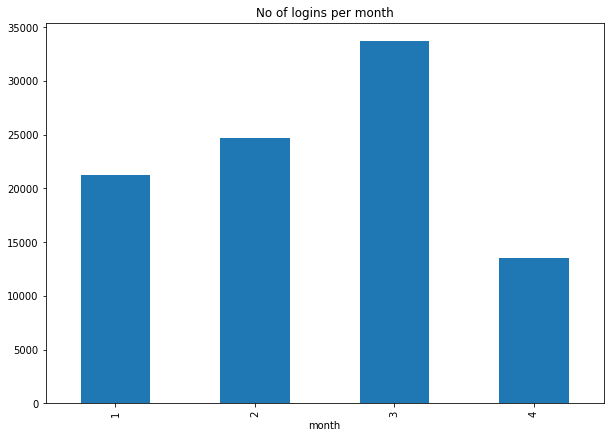

In [14]:
plt.figure(figsize=(10,7))
date_time_df.groupby('month')['login_count'].sum().plot.bar()
plt.title("No of logins per month")

### Month Wise Analysis

**Here is the four month login data. The amount of logins activity almost same in Jan(1) amd Feb(2) and bit more incread in March(3). but there is sharp downgrade in April?  This could be bad business month or could be incomplete data collection in April(4)**

In [15]:
jan_df = date_time_df[date_time_df['month']==1]
feb_df = date_time_df[date_time_df['month']==2]
mar_df = date_time_df[date_time_df['month']==3]
apr_df = date_time_df[date_time_df['month']==4]

In [16]:
jan_df.head()

,login_count,day,month,year,weekday,hour
login_time,,,,,,
1970-01-01 20:00:00,2,1,1,1970,3,20
1970-01-01 20:15:00,6,1,1,1970,3,20
1970-01-01 20:30:00,9,1,1,1970,3,20
1970-01-01 20:45:00,7,1,1,1970,3,20
1970-01-01 21:00:00,1,1,1,1970,3,21


In [17]:
def trends(df,title):
    list = [1,2,3,4,5,6,7]
    days_list = pd.Series(list) 
    jan_days = df['day']
    for jan_days in days_list:
        temp_df = df[df['weekday'] == jan_days]
        if jan_days in [1,2,3,4,5]:
            color = 'red'
        else:
            color = 'green'
        plt.plot(temp_df['login_count'],'.',color=color)
        plt.xticks(rotation=45)
        plt.title(title)
        plt.ylim([0,75])   

### WeekDays and WeekEnd Logins Details

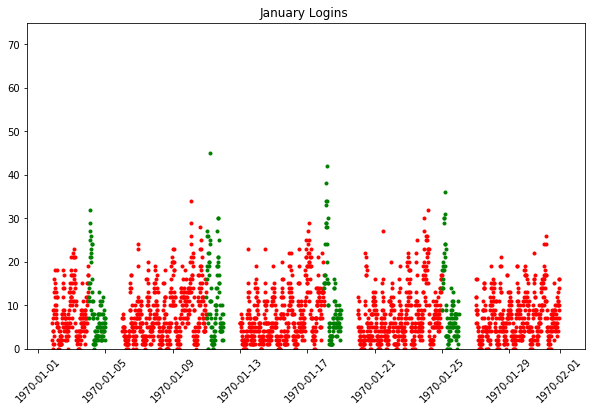

In [18]:
plt.figure(figsize=(10,6)) 
trends(jan_df, 'January Logins ')

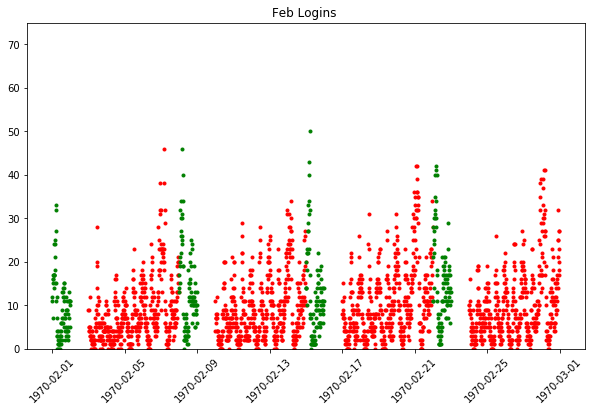

In [19]:
plt.figure(figsize=(10,6)) 
trends(feb_df, 'Feb Logins ')

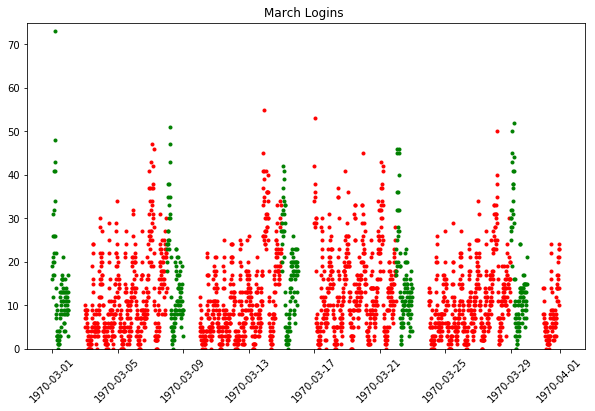

In [20]:
plt.figure(figsize=(10,6)) 
trends(mar_df, 'March Logins ')

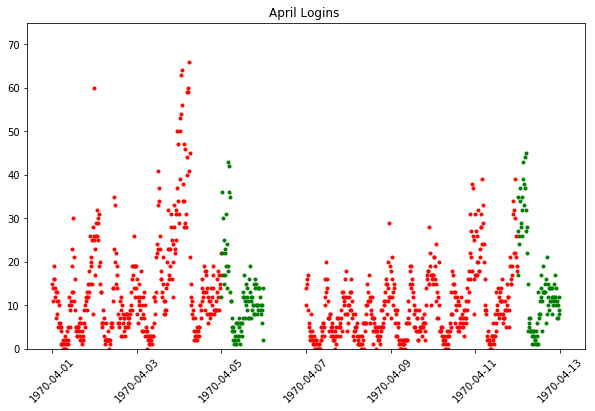

In [21]:
plt.figure(figsize=(10,6)) 
trends(apr_df, 'April Logins ')

**January and Feburary are almost similiar along with March which has slightly higher logins.**
**On other place April login came down may be because of data missing or not captured**

### Hourly Login Details

In [22]:
#plt.figure(figsize=10,6)


# Part 2 ‐ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

**What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?**

**Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:**

**how you will implement the experiment.**

**what statistical test(s) you will conduct to verify the significance of the observation.**

**how you would interpret the results and provide recommendations to the city operations team along with any caveats.**

# Part 3 ‐ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).

### Data description
● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYYMMDD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday

In [23]:
# Will add answer

In [24]:
file = open('ultimate_data_challenge.json','r')

In [25]:
master_challange_df = pd.DataFrame(json.load(file))

In [26]:
master_challange_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [27]:
#Findout any missing data
master_challange_df.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

In [28]:
master_challange_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [29]:
master_challange_df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [30]:
challange_bin_df = pd.DataFrame()
challange_bin_df = master_challange_df

# Feature Exploration

Text(0.5, 1.0, 'Correlation between features')

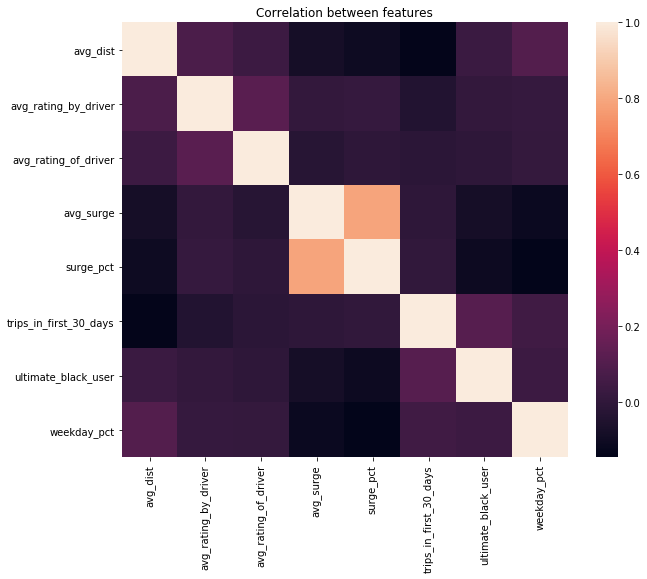

In [31]:
#corelation between features
plt.figure(figsize=(10,8))
sns.heatmap(challange_bin_df.corr())    # Pearson Correlation 
plt.title("Correlation between features")

In [32]:
challange_bin_df.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct'],
      dtype='object')

In [33]:
pair_df = challange_bin_df.drop(['city','signup_date','last_trip_date','ultimate_black_user','phone'],axis=1)

In [34]:
pair_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
0,3.67,5.0,4.7,1.10,15.4,4,46.2
1,8.26,5.0,5.0,1.00,0.0,0,50.0
2,0.77,5.0,4.3,1.00,0.0,3,100.0
3,2.36,4.9,4.6,1.14,20.0,9,80.0
4,3.13,4.9,4.4,1.19,11.8,14,82.4


In [35]:
from scipy import stats

/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


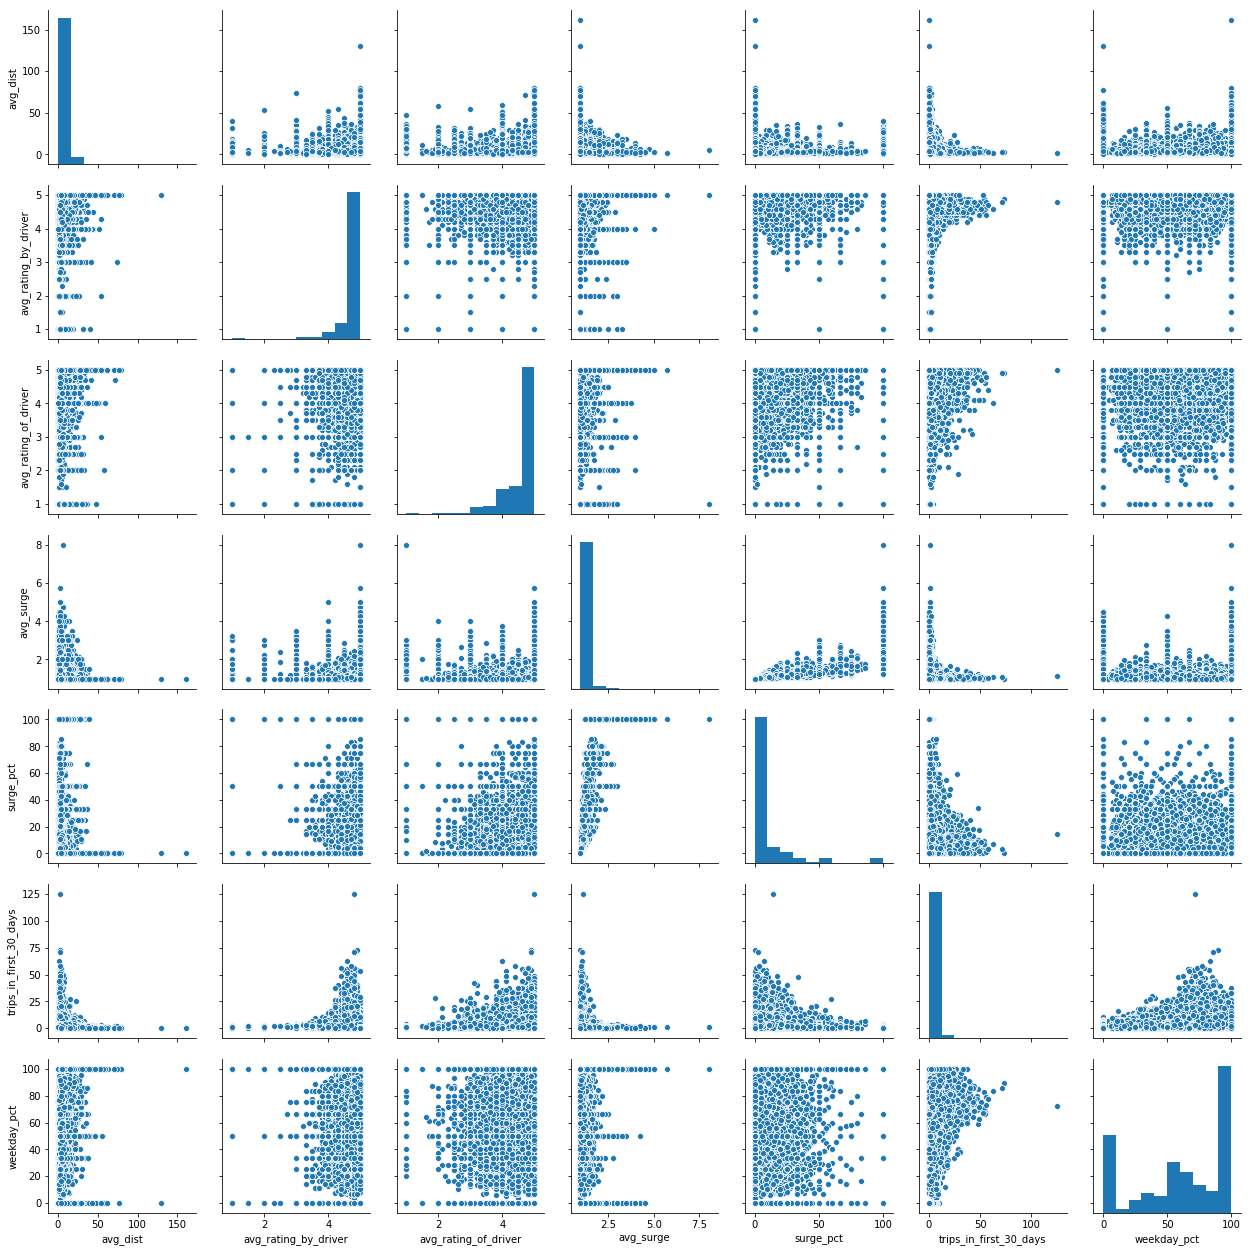

In [36]:
sns.pairplot(pair_df)

As we see pairplot, we can see these are feature are not linear or correlated to each other except **avg_surge and suge_pct** these two variable are somewhat correlated other wise all feature are independent. That conclude we can do some **Non-Paramertic** test to find out the relation in independent variables.   
**Also These variables are not normially distrubated.**

**We can't do PCA because these variable are idenpendent so we need to perfom Non-Paramertic**

   **Sperman Correlation** 
    
   **Chi Square Table**

In [37]:
avg_dist = pair_df['avg_dist']
avg_rat_by_driver = pair_df['avg_rating_by_driver']
spearman_coff , p_value = stats.spearmanr(avg_dist,avg_rat_by_driver)
print("Sperman Correlation Coefficient", (spearman_coff))

Sperman Correlation Coefficient nan


In [38]:
avg_surg = pair_df['avg_surge']
surg_pct = pair_df['surge_pct']
spearman_coff , p_value = stats.spearmanr(avg_surg,surg_pct)
print("Sperman Correlation Coefficient", spearman_coff)

Sperman Correlation Coefficient 0.9914806507932483


**Chi Squared Table (test of independent variable)**

P < 0.05 : Reject null hypothsis and conclude that the variable are correlated.

P > 0.05 : Accept null hypothsis and conclude the variables are independent.
    

In [39]:
table = pd.crosstab(pair_df['avg_dist'],pair_df['avg_rating_by_driver'])
chi2,p,dof,expected = stats.chi2_contingency(table.values)
print("Chi Square Statics",chi2)
print("P value ",p)

Chi Square Statics 49540.53949358063
P value  1.0


In [40]:
table = pd.crosstab(pair_df['avg_surge'],pair_df['surge_pct'])
chi2,p,dof,expected = stats.chi2_contingency(table.values)
print("Chi Square Statics",chi2)
print("P value ",p)

Chi Square Statics 546514.947215392
P value  0.0


In [41]:
table = pd.crosstab(pair_df['avg_dist'],pair_df['avg_rating_of_driver'])
chi2,p,dof,expected = stats.chi2_contingency(table.values)
print("Chi Square Statics",chi2)
print("P value ",p)

Chi Square Statics 62544.65291034185
P value  1.0


**As we see P values of these test are >0.05 so we can say they are indepedent except avg_surge,surge_pct variable**

In [42]:
challange_bin_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


### Missing Values

Text(0.5, 1.0, 'Features null values representation')

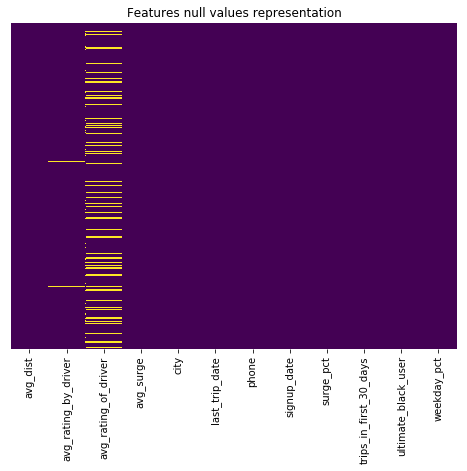

In [43]:
plt.figure(figsize=(8,6))
sns.heatmap(data=challange_bin_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title("Features null values representation")

**this heat map is clearly stating that we have to deal with null values in columns ('avg_rating_by_driver','avg_rating_of_driver')**

### Feature : avg_rating_by_driver

In [44]:
challange_bin_df['avg_rating_by_driver'].isnull().sum()

201

In [45]:
challange_bin_df['avg_rating_by_driver'].mean()

4.778158195947439

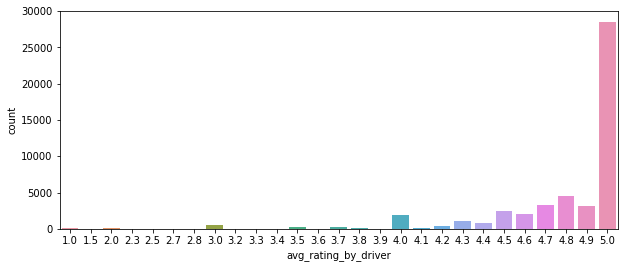

In [47]:
plt.figure(figsize=(10,4))
sns.countplot(x = 'avg_rating_by_driver',data=challange_bin_df)

**So far my understanding is to fill missing values by statistics manupulation (Mean, mode, median) is good. But we should not directly take mean and fill it against missing values. Its always good parctice to see which all feature has most relevent mean. Therefore here we are exploring different features and then decide which mean we need to fill.**

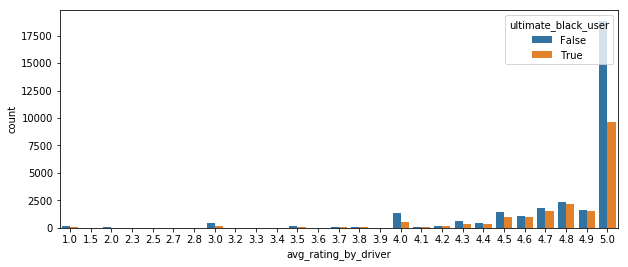

In [48]:
plt.figure(figsize=(10,4))
sns.countplot(x = 'avg_rating_by_driver',hue='ultimate_black_user',data=challange_bin_df)

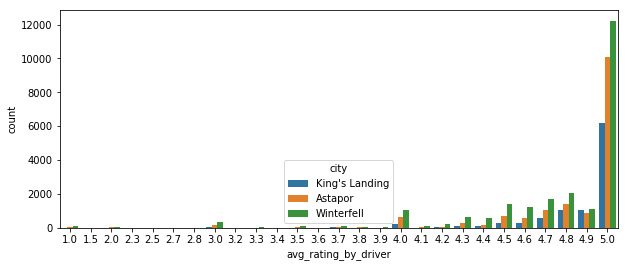

In [49]:
plt.figure(figsize=(10,4))
sns.countplot(x = 'avg_rating_by_driver',hue='city',data=challange_bin_df)

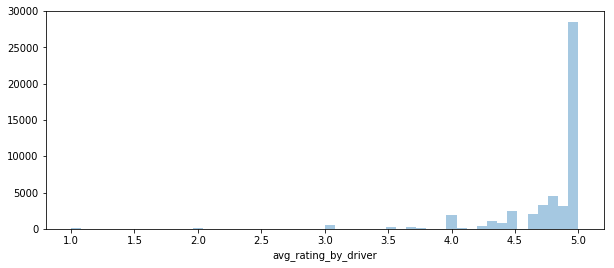

In [50]:
#Kernal distribution estimation
plt.figure(figsize=(10,4))
sns.distplot(challange_bin_df['avg_rating_by_driver'].dropna(),kde=False)

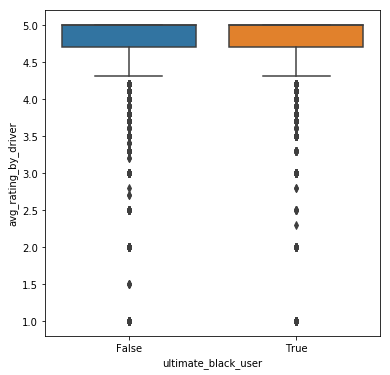

In [51]:
plt.figure(figsize=(6,6))
sns.boxplot(x = 'ultimate_black_user',y='avg_rating_by_driver',data=challange_bin_df)

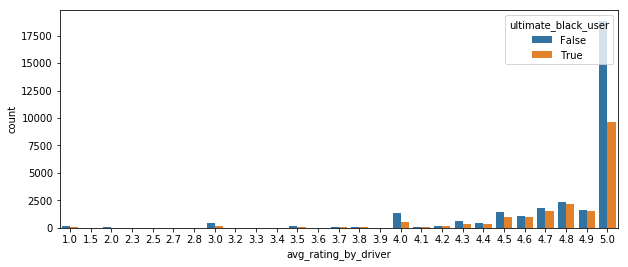

In [56]:
plt.figure(figsize=(10,4))
sns.countplot(x='avg_rating_by_driver',hue='ultimate_black_user', data=challange_bin_df)

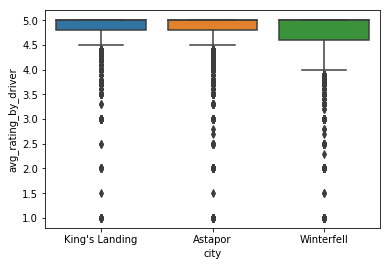

In [54]:
plt.figure(figsize=(6,4))
sns.boxplot(x = 'city',y='avg_rating_by_driver',data=challange_bin_df)

**After checking whole these features we can take mean of non ultimate_black_user or mean of city='Winterfell'. Why because there two features values has most number of existance in the parituclar column data. Therefore their mean could be more realistic for missing values**

In [61]:
challange_bin_df['avg_rating_by_driver'].isnull().sum()

201

In [64]:
challange_bin_df['avg_rating_by_driver'].fillna(challange_bin_df[challange_bin_df['ultimate_black_user']==False]['avg_rating_by_driver'].mean(),inplace=True)

In [65]:
challange_bin_df['avg_rating_by_driver'].isnull().sum()

0

### Feature : avg_rating_of_driver

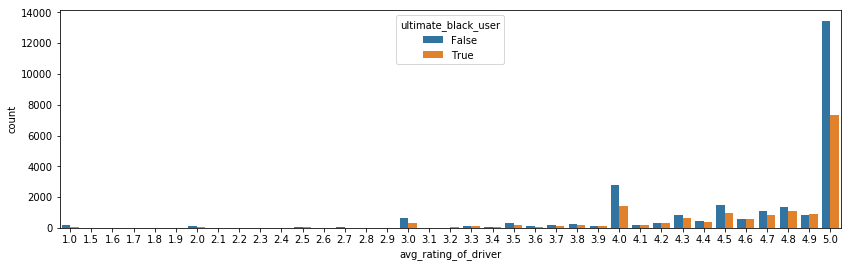

In [70]:
plt.figure(figsize=(14,4))
sns.countplot(x='avg_rating_of_driver',hue='ultimate_black_user',data=challange_bin_df)

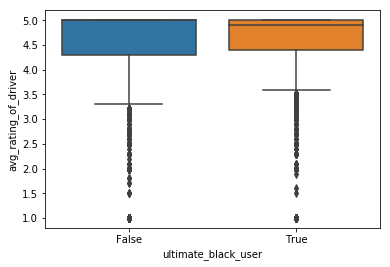

In [73]:
plt.figure(figsize=(6,4))
sns.boxplot(x='ultimate_black_user',y='avg_rating_of_driver',data=challange_bin_df)

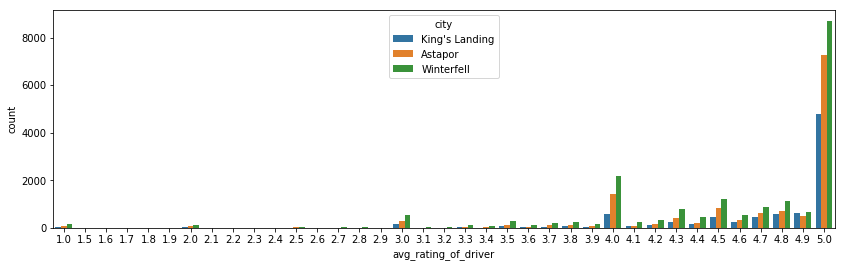

In [75]:
plt.figure(figsize=(14,4))
sns.countplot(x='avg_rating_of_driver', hue='city',data=challange_bin_df)

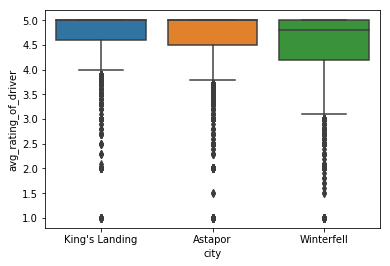

In [77]:
plt.figure(figsize=(6,4))
sns.boxplot(x='city',y='avg_rating_of_driver',data=challange_bin_df)

In [82]:
challange_bin_df['avg_rating_of_driver'].fillna(challange_bin_df[challange_bin_df['city']=='Winterfell']['avg_rating_of_driver'].mean(),inplace=True)

In [83]:
challange_bin_df['avg_rating_of_driver'].isnull().sum()

0

In [84]:
challange_bin_df.isnull().sum()

avg_dist                    0
avg_rating_by_driver        0
avg_rating_of_driver        0
avg_surge                   0
city                        0
last_trip_date              0
phone                     396
signup_date                 0
surge_pct                   0
trips_in_first_30_days      0
ultimate_black_user         0
weekday_pct                 0
dtype: int64

**I guess phone number is really not important feature here so for now I'm removing it from the dataset**

In [87]:
bin_df =  pd.DataFrame()
bin_df = challange_bin_df.drop('phone',axis=1)

In [88]:
bin_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,2014-01-27,11.8,14,False,82.4


#### No of trips in first 30 days by cities

In [106]:
bin_df.groupby('city')['trips_in_first_30_days'].sum()

city
Astapor           32219
King's Landing    24957
Winterfell        56734
Name: trips_in_first_30_days, dtype: int64

Text(0.5, 1.0, 'trip count in first 30 days')

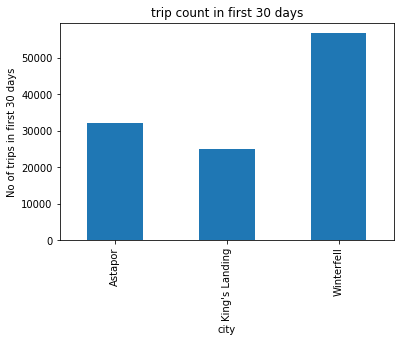

In [105]:
bin_df.groupby('city')['trips_in_first_30_days'].sum().plot(kind='bar')
plt.ylabel('No of trips in first 30 days')
plt.title('trip count in first 30 days')

#### Who is frequest user?

Text(0.5, 1.0, 'No of trips taken by ultimate_black_user')

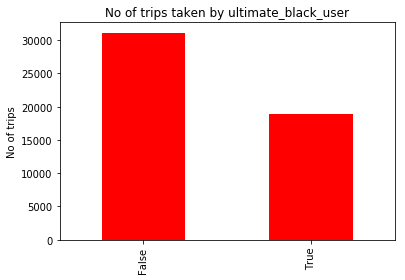

In [167]:
bin_df['ultimate_black_user'].value_counts().plot(kind='bar',color='red')
plt.ylabel('No of trips')
plt.title('No of trips taken by ultimate_black_user')


Most frequest users are not 'ultimate black user'

### Most number of users by city who paied most surge

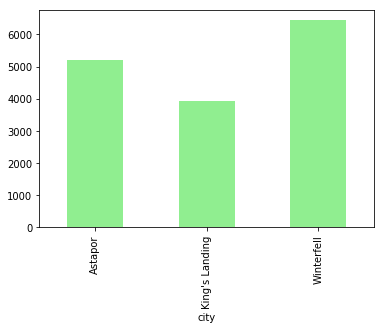

In [164]:
bin_df[bin_df['surge_pct']>0.0].groupby('city')['surge_pct'].count().plot(kind='bar',color='lightgreen')

Text(0.5, 1.0, 'No of trips taken by ultimate_black_user')

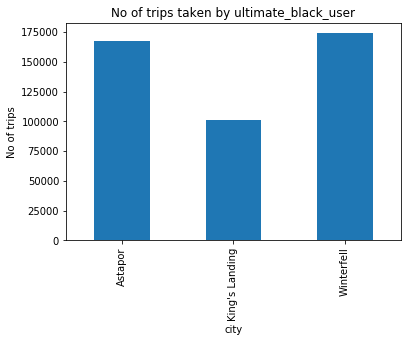

In [132]:
bin_df.groupby('city')['surge_pct'].sum().plot(kind='bar')
plt.ylabel('No of trips')
plt.title('No of trips taken by ultimate_black_user')


### Weekdays and Weekend trends

In [169]:
bin_df['last_trip_date'] = pd.to_datetime(bin_df['last_trip_date'])

**lets find out if we have weekend data**

In [190]:
dates_df = bin_df[['last_trip_date','trips_in_first_30_days']]

In [209]:
def trips(df):
    trip_dict={}
    weekend_trips=0;
    weekday_trips=0;
    for day in df['last_trip_date'].dt.weekday:
        if day>5:
            weekend_trips+=1
        else:
            weekday_trips+=1

    trip_dict= [{'weekday_trips':weekday_trips,'weekend_trips':weekend_trips}]        
    return trip_dict;

In [215]:
trip_df = pd.DataFrame().from_dict(trips(bin_df))

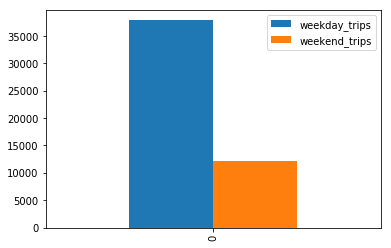

In [220]:
trip_df.plot(kind='bar')

this plot ideal becuase most of people use cabs in weekdays because of their office commute and that number is quiet high

# Model